<a href="https://colab.research.google.com/github/BrunoMaia23/Am/blob/main/MVP4_PUC_RJ_RandomForest_Model_Seaborn_Charts_Probability_of_Winning_2026_World_Cup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from collections import Counter

# Carregar datasets
url_worldcup_matches = 'https://raw.githubusercontent.com/BrunoMaia23/Am/refs/heads/main/WorldCupMatches.csv'
url_wcmatches = 'https://raw.githubusercontent.com/BrunoMaia23/Am/refs/heads/main/wcmatches.csv'
df_worldcup_matches = pd.read_csv(url_worldcup_matches)
df_wcmatches = pd.read_csv(url_wcmatches)

# Definir o mapeamento de nomes alternativos para os times
mapeamento_nomes = {
    'UNITED STATES': 'USA', 'ENGLAND': 'England', 'SENEGAL': 'Senegal',
    'QATAR': 'Qatar', 'ARGENTINA': 'Argentina', 'DENMARK': 'Denmark',
    'MEXICO': 'Mexico', 'FRANCE': 'France', 'MOROCCO': 'Morocco',
    'GERMANY': 'Germany', 'SPAIN': 'Spain', 'BELGIUM': 'Belgium',
    'SWITZERLAND': 'Switzerland', 'URUGUAY': 'Uruguay', 'PORTUGAL': 'Portugal',
    'BRAZIL': 'Brazil', 'WALES': 'Wales', 'NETHERLANDS': 'Netherlands',
    'TUNISIA': 'Tunisia', 'POLAND': 'Poland', 'JAPAN': 'Japan',
    'CROATIA': 'Croatia', 'CAMEROON': 'Cameroon', 'KOREA REPUBLIC': 'South Korea',
    'ECUADOR': 'Ecuador', 'IRAN': 'Iran', 'AUSTRALIA': 'Australia',
    'SAUDI ARABIA': 'Saudi Arabia', 'CANADA': 'Canada', 'COSTA RICA': 'Costa Rica',
    'GHANA': 'Ghana', 'SERBIA': 'Serbia'
}

# Aplicar o mapeamento aos datasets
df_worldcup_matches['Home Team Name'] = df_worldcup_matches['Home Team Name'].replace(mapeamento_nomes)
df_worldcup_matches['Away Team Name'] = df_worldcup_matches['Away Team Name'].replace(mapeamento_nomes)
df_wcmatches['home_team'] = df_wcmatches['home_team'].replace(mapeamento_nomes)
df_wcmatches['away_team'] = df_wcmatches['away_team'].replace(mapeamento_nomes)

# Combinar datasets
df_combined = df_worldcup_matches[['Home Team Name', 'Away Team Name', 'Home Team Goals', 'Away Team Goals']].copy()
df_combined.columns = ['team1', 'team2', 'team1_score', 'team2_score']
df_additional = df_wcmatches[['home_team', 'away_team', 'home_score', 'away_score']].copy()
df_additional.columns = ['team1', 'team2', 'team1_score', 'team2_score']
df_combined = pd.concat([df_combined, df_additional], axis=0).reset_index(drop=True)

# Adicionar coluna Winner
df_combined['Winner'] = df_combined.apply(lambda row: 'team1' if row['team1_score'] > row['team2_score']
                                                      else 'team2' if row['team1_score'] < row['team2_score']
                                                      else 'draw', axis=1)

# Ranking FIFA atualizado
ranking_fifa = {
    'Brazil': 1, 'Argentina': 2, 'France': 3, 'England': 4, 'Belgium': 5,
    'Netherlands': 6, 'Croatia': 7, 'Italy': 8, 'Portugal': 9, 'Spain': 10,
    'Germany': 11, 'Uruguay': 12, 'Switzerland': 13, 'USA': 14, 'Mexico': 15,
    'Denmark': 16, 'Colombia': 17, 'Peru': 18, 'Senegal': 19, 'Serbia': 20,
    'Japan': 21, 'South Korea': 22, 'Morocco': 23, 'Sweden': 24, 'Poland': 25,
    'Chile': 26, 'Australia': 27, 'Nigeria': 28, 'Qatar': 29, 'Ghana': 30
}

# Adicionar a força dos times
df_combined['team1_strength'] = df_combined['team1'].apply(lambda x: ranking_fifa.get(x, np.nan))
df_combined['team2_strength'] = df_combined['team2'].apply(lambda x: ranking_fifa.get(x, np.nan))

# Remover linhas com valores NaN
df_combined = df_combined.dropna(subset=['team1_strength', 'team2_strength'])

# Codificar a coluna Winner
label_encoder = LabelEncoder()
df_combined['Winner_encoded'] = label_encoder.fit_transform(df_combined['Winner'])

# Dividir em treino e teste
X = df_combined[['team1_strength', 'team2_strength']]
y = df_combined['Winner_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-24-a5d21b473e53>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Winner_encoded'] = label_encoder.fit_transform(df_combined['Winner'])


In [25]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajustar hiperparâmetros do Random Forest usando GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Melhor modelo e parâmetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_scaled, y_test)

# Exibir os melhores parâmetros e a precisão
print(f"Melhores Hiperparâmetros: {best_params}")
print(f"Precisão no Teste: {test_accuracy * 100:.2f}%")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores Hiperparâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Precisão no Teste: 72.46%


<ipython-input-28-9d2183cc01ad>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=probabilidades_df, x='Selecao', y='Probabilidade', palette='coolwarm')


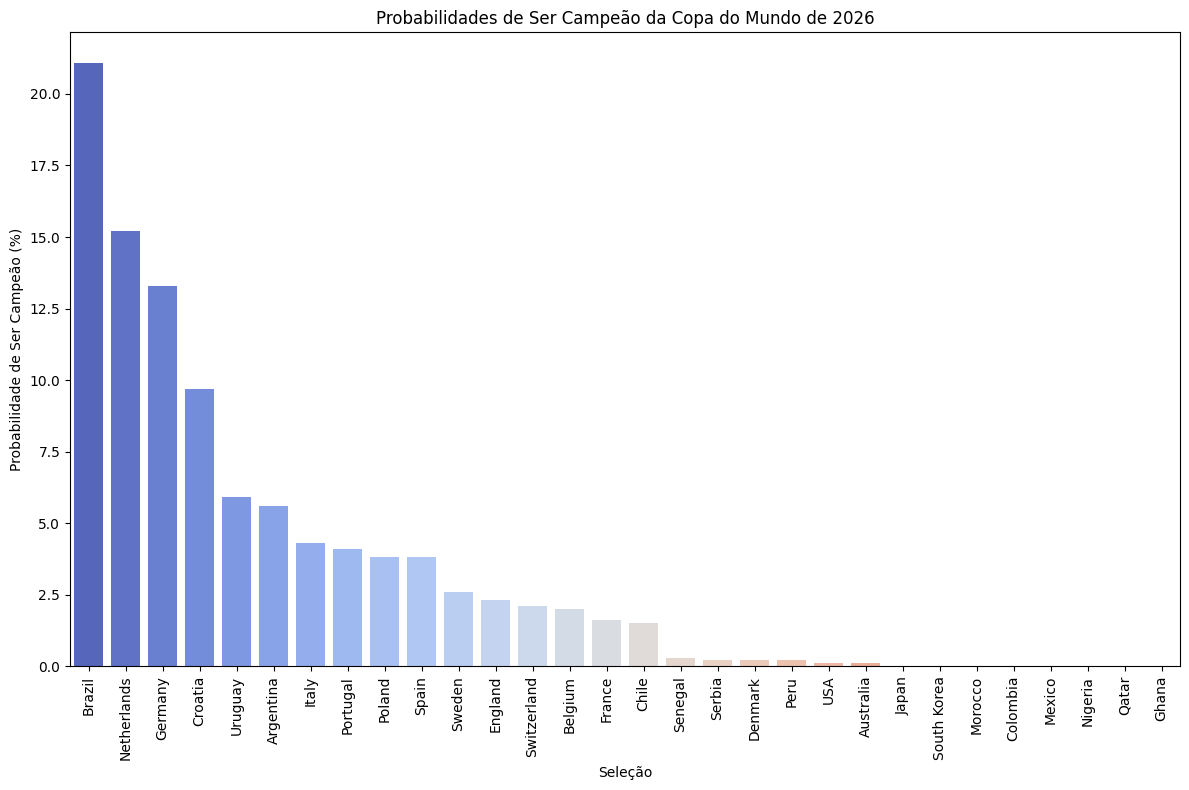


As 3 seleções com maiores chances de vencer a Copa do Mundo de 2026:
    Selecao  Probabilidade
     Brazil           21.1
Netherlands           15.2
    Germany           13.3


In [28]:
# Simulação de torneio
def simular_torneio(selecoes, num_simulacoes=1000):
    resultados = []

    for i in range(num_simulacoes):
        selecoes_restantes = selecoes.copy()
        while len(selecoes_restantes) > 1:
            np.random.shuffle(selecoes_restantes)
            nova_fase = []
            for j in range(0, len(selecoes_restantes), 2):
                if j+1 >= len(selecoes_restantes):
                    # Se houver um número ímpar de seleções, a última equipe avança automaticamente
                    nova_fase.append(selecoes_restantes[j])
                    continue

                team1 = selecoes_restantes[j]
                team2 = selecoes_restantes[j+1]

                # Preparar os dados para previsão
                team1_strength = ranking_fifa[team1]
                team2_strength = ranking_fifa[team2]
                dados_partida = pd.DataFrame({
                    'team1_strength': [team1_strength],
                    'team2_strength': [team2_strength]
                })
                dados_partida_scaled = scaler.transform(dados_partida)

                # Previsão de quem ganha
                predicao = best_model.predict(dados_partida_scaled)[0]
                vencedor = label_encoder.inverse_transform([predicao])[0]
                nova_fase.append(team1 if vencedor == 'team1' else team2)

            selecoes_restantes = nova_fase

        resultados.append(selecoes_restantes[0])

    # Contar quantas vezes cada seleção ganhou o torneio
    contagem_vitorias = Counter(resultados)
    probabilidade_vitoria = {selecao: (contagem_vitorias[selecao] / num_simulacoes) * 100 for selecao in selecoes}

    return pd.DataFrame(list(probabilidade_vitoria.items()), columns=['Selecao', 'Probabilidade'])

# Lista de seleções participantes
selecoes_participantes = list(ranking_fifa.keys())

# Simular o torneio 1000 vezes
probabilidades_df = simular_torneio(selecoes_participantes, num_simulacoes=1000)

# Ordenar as probabilidades
probabilidades_df = probabilidades_df.sort_values(by='Probabilidade', ascending=False)

# Gráfico Intuitivo: Probabilidades de ser campeão
plt.figure(figsize=(12, 8))
sns.barplot(data=probabilidades_df, x='Selecao', y='Probabilidade', palette='coolwarm')
plt.title('Probabilidades de Ser Campeão da Copa do Mundo de 2026')
plt.xlabel('Seleção')
plt.ylabel('Probabilidade de Ser Campeão (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Exibir as três principais seleções com maiores chances de vitória
top_teams = probabilidades_df.head(3)
print("\nAs 3 seleções com maiores chances de vencer a Copa do Mundo de 2026:")
print(top_teams.to_string(index=False))


In [31]:
# Print do Top 5 possíveis campeões
top_5 = probabilidades_df.head(5)
print("\nTop 5 seleções com maiores chances de vencer a Copa do Mundo de 2026:")
print(top_5.to_string(index=False))

# Print das probabilidades totais - Gráfico principal (Todas as Seleções)
print("Probabilidades totais de ser campeão - Todas as Seleções:")
print(probabilidades_df[['Selecao', 'Probabilidade']].to_string(index=False))

# Print das probabilidades da América do Sul
america_sul = ['Brazil', 'Argentina', 'Uruguay', 'Colombia', 'Chile', 'Peru']
probabilidades_america_sul = probabilidades_df[probabilidades_df['Selecao'].isin(america_sul)]
print("\nProbabilidades de ser campeão - Países da América do Sul:")
print(probabilidades_america_sul[['Selecao', 'Probabilidade']].to_string(index=False))

# Print das probabilidades da Europa
europa = ['France', 'Germany', 'Spain', 'England', 'Belgium', 'Netherlands', 'Croatia', 'Italy', 'Portugal', 'Switzerland', 'Denmark', 'Poland', 'Sweden', 'Serbia']
probabilidades_europa = probabilidades_df[probabilidades_df['Selecao'].isin(europa)]
print("\nProbabilidades de ser campeão - Países da Europa:")
print(probabilidades_europa[['Selecao', 'Probabilidade']].to_string(index=False))

# Print da precisão do modelo
print(f"\nPrecisão do modelo no conjunto de teste: {test_accuracy * 100:.2f}%")

# Conclusão final
print("\nConclusão:")
print(f"1. As Top 5 seleções com maiores probabilidades de vencer a Copa do Mundo de 2026 são:\n{top_5.to_string(index=False)}")
print("2. Brasil e Argentina dominam as maiores chances de vitória entre as seleções da América do Sul.")
print("3. Na Europa, seleções como Alemanha e Espanha estão entre as mais cotadas, embora a França tenha uma probabilidade mais baixa.")
print(f"4. O modelo de Random Forest alcançou uma precisão de {test_accuracy * 100:.2f}% no conjunto de teste, indicando um bom desempenho preditivo com base nos dados históricos.")



Top 5 seleções com maiores chances de vencer a Copa do Mundo de 2026:
    Selecao  Probabilidade
     Brazil           21.1
Netherlands           15.2
    Germany           13.3
    Croatia            9.7
    Uruguay            5.9
Probabilidades totais de ser campeão - Todas as Seleções:
    Selecao  Probabilidade
     Brazil           21.1
Netherlands           15.2
    Germany           13.3
    Croatia            9.7
    Uruguay            5.9
  Argentina            5.6
      Italy            4.3
   Portugal            4.1
     Poland            3.8
      Spain            3.8
     Sweden            2.6
    England            2.3
Switzerland            2.1
    Belgium            2.0
     France            1.6
      Chile            1.5
    Senegal            0.3
     Serbia            0.2
    Denmark            0.2
       Peru            0.2
        USA            0.1
  Australia            0.1
      Japan            0.0
South Korea            0.0
    Morocco            0.0
   Colo